<a href="https://colab.research.google.com/github/Matrix7043/Machine_learning101/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv(r"/content/sample_data/processed.cleveland.data", header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
df.columns = [
      'age',
      'sex',
      'cp',
      'trestbps',
      'chol',
      'fbs',
      'restecg',
      'thalach',
      'exang',
      'oldpeak',
      'slope',
      'ca',
      'thal',
      'hd' ]

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df['age'].unique()

array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
       71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
       74., 76.])

In [11]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [12]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [13]:
len(df[(df['ca'] == "?") | (df['thal'] == "?")])

6

In [15]:
df[(df['ca'] == "?") | (df['thal'] == "?")]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [16]:
len(df)

303

In [17]:
df_non_null = df[(df['ca'] != "?") & (df['thal'] != "?")]

In [18]:
len(df_non_null)

297

In [26]:
df_non_null['ca'].astype(float)

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
297    0.0
298    0.0
299    2.0
300    1.0
301    1.0
Name: ca, Length: 297, dtype: float64

In [25]:
df_non_null['thal'].astype(float)

0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
297    7.0
298    7.0
299    7.0
300    7.0
301    3.0
Name: thal, Length: 297, dtype: float64

In [24]:
X = df_non_null.drop('hd', axis=1).copy()
y = df_non_null['hd'].copy()

In [29]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [30]:
y.unique()

array([0, 2, 1, 3, 4])

In [31]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No_hd'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No_hd'),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No_hd'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No_hd'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No_hd'),
 Text(0.05172413793103448, 0.5416666666666666, 'trestbps <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No_hd'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No_hd'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No_hd'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngini = 

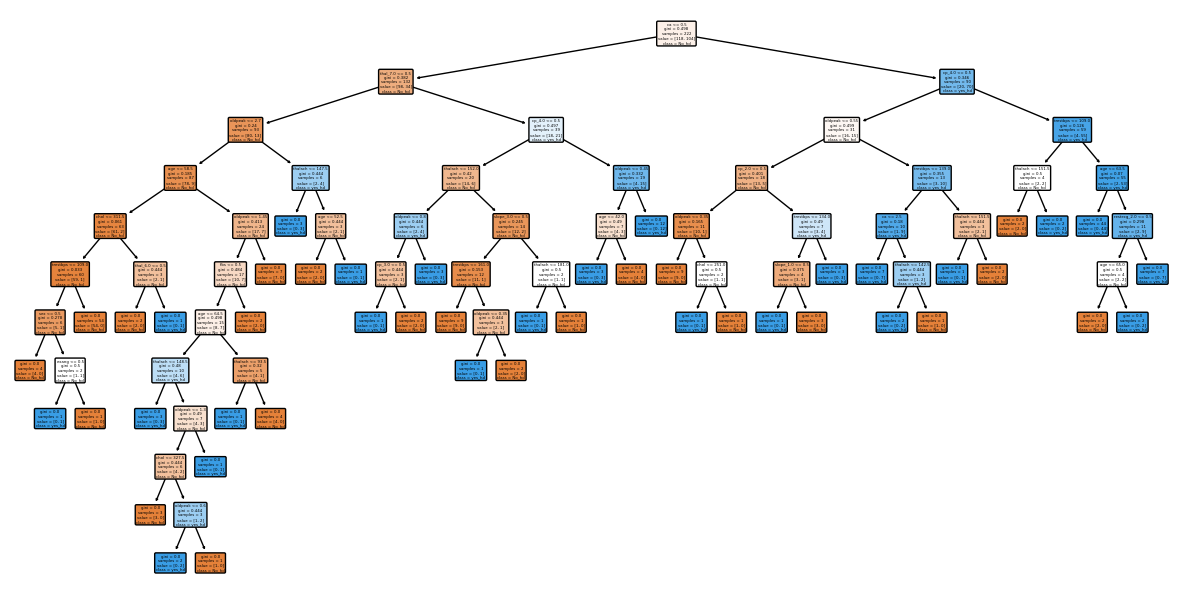

In [35]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No_hd", "yes_hd"],
          feature_names=X_encoded.columns)

In [36]:
y_pred = clf_dt.predict(X_test)

In [37]:
cm = confusion_matrix(y_test, y_pred)

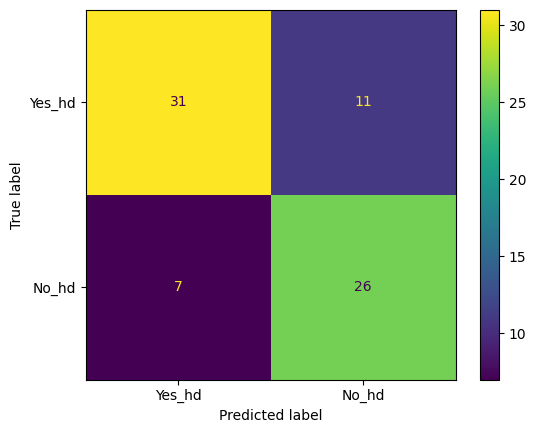

In [39]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['Yes_hd', 'No_hd'])
cmd.plot()

In [40]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for i in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)


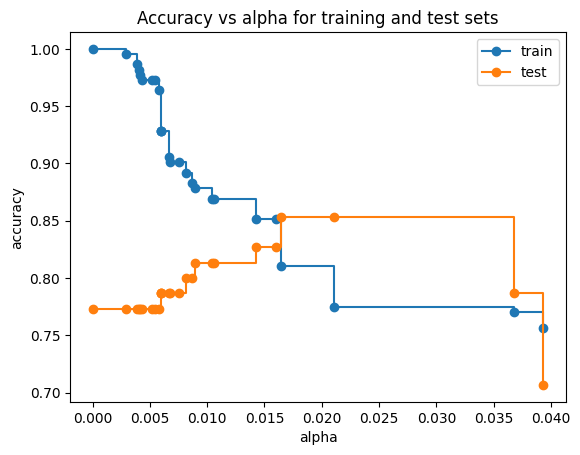

In [42]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and test sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

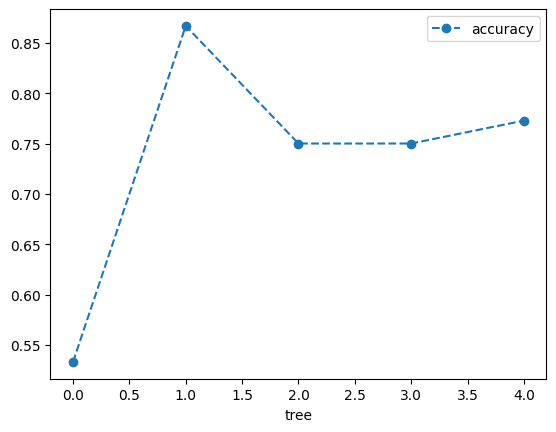

In [43]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy':scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

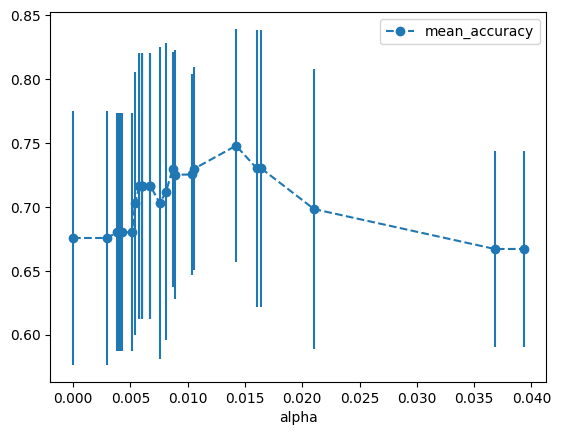

In [47]:
alpha_loop_values = []

for i in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([i, np.mean(scores), np.std(scores)])

alpha_result = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_result.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')


In [48]:
ideal_ccp_alpha = alpha_result[(alpha_result['alpha'] > 0.014) & (alpha_result['alpha'] < 0.015)]
ideal_ccp_alpha

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [57]:
ideal = float(ideal_ccp_alpha.iloc[0]['alpha'])
ideal

0.014224751066856332

In [58]:
clf_dt_p = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal)
clf_dt_p = clf_dt_p.fit(X_train, y_train)

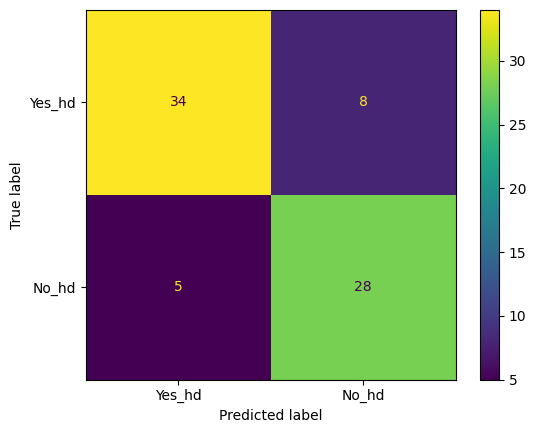

In [59]:
y_pred = clf_dt_p.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Yes_hd', 'No_hd'])
cmd.plot()

[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No_hd'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No_hd'),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No_hd'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No_hd'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes_hd'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes_hd'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No_hd'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes_hd'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes_hd'),
 Text(0.7692307692307693, 0.375, 'oldpeak <= 0.5

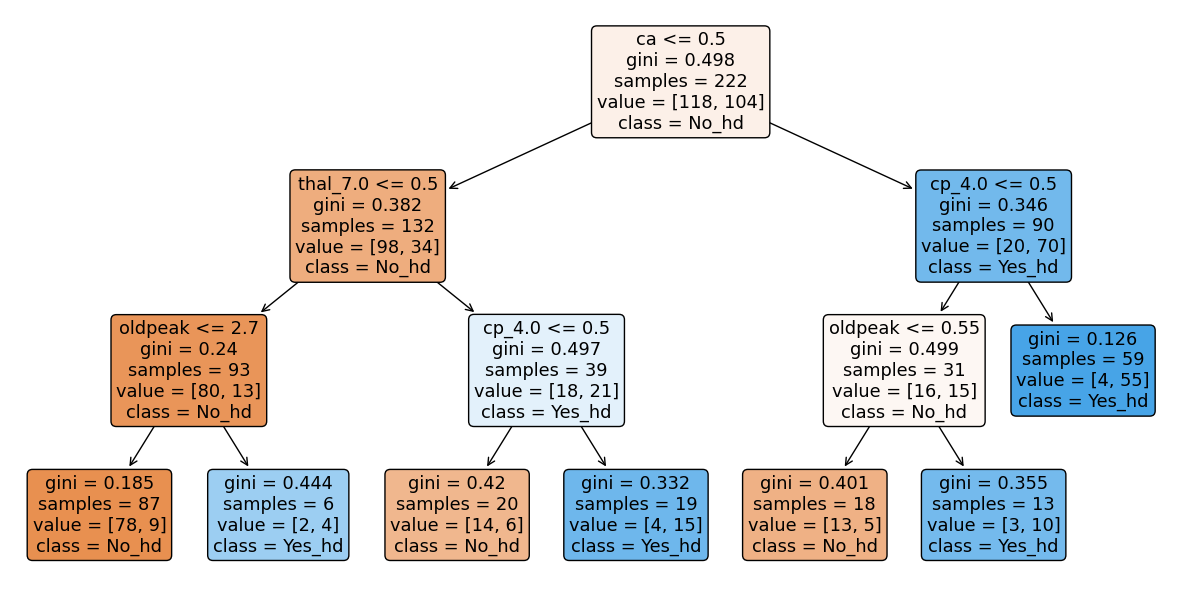

In [60]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_p,
          filled=True,
          rounded=True,
          class_names=["No_hd", "Yes_hd"],
          feature_names=X_encoded.columns)